## Dự đoán nấm độc hay không độc

> Văn bản được thụt lề



Dataset: https://www.kaggle.com/datasets/uciml/mushroom-classification/data

(classes: edible=e, poisonous=p)
cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [1]:
#Import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
# Read the "mushroom.csv" file
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Data preprocessing

In [4]:
df.isnull().sum() #kt gia tri null

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
df.describe() #dac trung cua tung cot

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


# Feature selection

In [6]:
df = df.apply(LabelEncoder().fit_transform) #Mã hóa dữ liệu
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [7]:
df = df.rename(columns={'class': 'kind'})

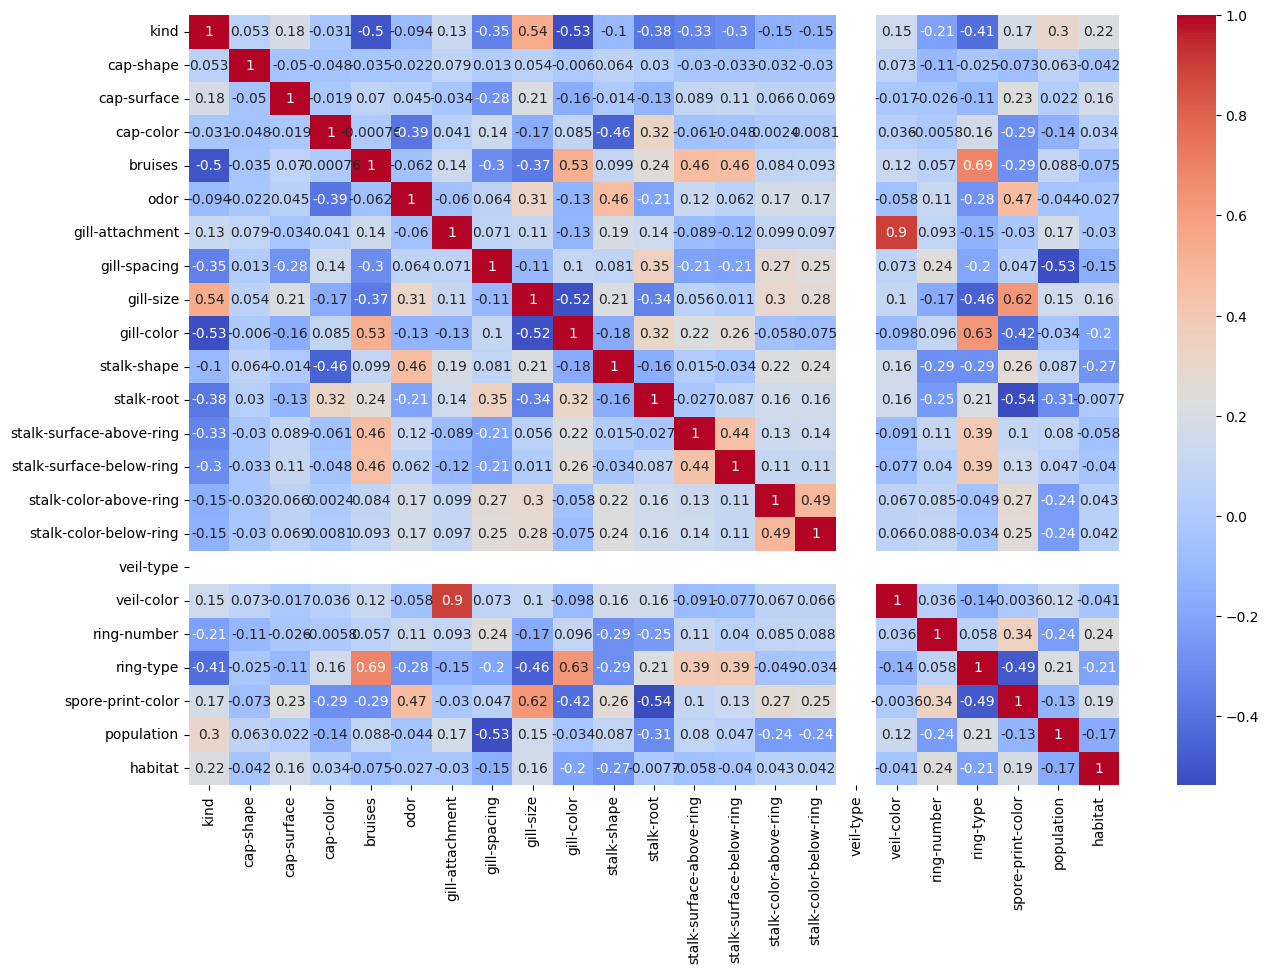

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True, cmap="coolwarm");

In [9]:
df.corr().kind.sort_values(ascending=False)

kind                        1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
stalk-root                 -0.379361
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
veil-type                        NaN
Name: kind, dtype: float64

In [10]:
# target y  #features x chọn từ tương quan (0,2 đến 0,9) và (-0,9 hoặc -0,2)
y = df['kind'].values
X = df[["gill-size","population","habitat","gill-color","bruises","ring-type","stalk-root",
        "gill-spacing","stalk-surface-above-ring","stalk-surface-below-ring","ring-number"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# Training Model bằng Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
# Khởi tạo mô hình Logistic Regression
model = LogisticRegression()

# Huấn luyện mô hình trên tập huấn luyện
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Dự đoán nhãn trên tập kiểm tra
y_pred = model.predict(X_test)

# Tính độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.938884331419196


# Cải tiến 1: Sử dụng GridSearchCV để tối ưu hóa siêu tham số

In [13]:
from sklearn.model_selection import GridSearchCV

In [16]:
# Định nghĩa mô hình Logistic Regression
model = LogisticRegression()

# Định nghĩa các giá trị siêu tham số để tìm kiếm
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'max_iter': [100, 500, 1000],
    'solver': ['liblinear', 'saga']
}

In [17]:
# Tìm kiếm siêu tham số tốt nhất bằng GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=10, error_score='raise')
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=10, error_score='raise', estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'max_iter': [100, 500, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [ ]:
# In ra siêu tham số tốt nhất và độ chính xác tương ứng
print("Best parameters:", grid_search.best_params_)

# Sử dụng mô hình tốt nhất để dự đoán
best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

Best parameters: {'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
# Tính toán độ chính xác trên tập huấn luyện và tập kiểm tra
accuracy1 = accuracy_score(y_train, y_pred_train)
print("Train acc: %.4f" % accuracy1)
accuracy2 = accuracy_score(y_test, y_pred_test)
print("Test acc: %.4f" % accuracy2)

Train acc: 0.9390
Test acc: 0.9389


Sử dụng GridSearchCV sẽ giúp tự động tìm siêu tham số tốt nhất với mô hình so với việc chỉ dùng Logistic Regression thông thường bởi nó dựa trên một loạt các tham số cho trước, tự tìm ra các giá trị tối ưu nhất.

# Cải tiến 2: Sử dụng Random Forest và Logistic Regression

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [ ]:
# Định nghĩa mô hình Random Forest với 100 cây quyết định
rf_model = RandomForestClassifier(n_estimators=100)

# Tạo một Ensemble với mô hình Logistic Regression và Random Forest
ensemble_model = VotingClassifier([('logistic', model), ('random_forest', rf_model)])

# Huấn luyện mô hình Ensemble
ensemble_model.fit(X_train, y_train)


VotingClassifier(estimators=[('logistic',
                              LogisticRegression(solver='liblinear')),
                             ('random_forest', RandomForestClassifier())])

In [ ]:
# Dự đoán trên tập huấn luyện và tập kiểm tra
y_pred_train_ensemble = ensemble_model.predict(X_train)
y_pred_test_ensemble = ensemble_model.predict(X_test)

# Tính toán độ chính xác trên tập huấn luyện và tập kiểm tra
accuracy_ensemble_train = accuracy_score(y_train, y_pred_train_ensemble)
print("Ensemble Train acc: %.4f" % accuracy_ensemble_train)
accuracy_ensemble_test = accuracy_score(y_test, y_pred_test_ensemble)
print("Ensemble Test acc: %.4f" % accuracy_ensemble_test)

Ensemble Train acc: 0.9573
Ensemble Test acc: 0.9553


Cải tiến 2 sử dụng Ensemble Methods để kết hợp hai mô hình Logistic Regression và Random Forest. Logistic Regression có xu hướng chạy nhanh hơn, không trong khi Random Forest sẽ làm giảm over fitting.

# Cải tiến 3: Sử dụng KNN và Logistic Regression

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Định nghĩa mô hình KNN
knn_model = KNeighborsClassifier(n_neighbors=5)


In [ ]:
# Tạo một Ensemble với mô hình KNN và Logistic Regression
ensemble_model = VotingClassifier([('knn', knn_model), ('logistic', model)])

# Huấn luyện mô hình Ensemble
ensemble_model.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('logistic', LogisticRegression())])

In [ ]:
# Dự đoán trên tập huấn luyện và tập kiểm tra
y_pred_train_ensemble = ensemble_model.predict(X_train)
y_pred_test_ensemble = ensemble_model.predict(X_test)

# Tính toán độ chính xác trên tập huấn luyện và tập kiểm tra
accuracy_ensemble_train = accuracy_score(y_train, y_pred_train_ensemble)
print("Ensemble Train acc: %.4f" % accuracy_ensemble_train)
accuracy_ensemble_test = accuracy_score(y_test, y_pred_test_ensemble)
print("Ensemble Test acc: %.4f" % accuracy_ensemble_test)

Ensemble Train acc: 0.9606
Ensemble Test acc: 0.9573


Cải tiến 3 sử dụng Ensemble Methods để kết hợp hai mô hình Logistic Regression và KNN. Khi kết hợp hai mô hình này sẽ làm giảm nhiễu vì Logistic Regression có khả năng khái quát tốt, nhanh hơn khi xử lý các đặc trưng do KNN có khả năng xử lý các đặc trung phức tạp.